# Predictive Model: Data Injection and Visualization for Dutch TTF Natural Gas Futures
This notebook demonstrates how to handle missing days in the Dutch TTF Natural Gas Futures dataset using linear interpolation, and visualizes the results. The approach leverages daily high, low, and percentage change columns for more informed interpolation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

## Load the TTF Training Data
Read the historical Dutch TTF Natural Gas Futures data and inspect the first few rows.

In [2]:
# The CSV was read as a single column due to semicolon delimiter. Let's fix that.
file_path = 'Dutch TTF Natural Gas Futures Historical Data training.csv'
df = pd.read_csv(file_path, delimiter=';')
print('Columns:', df.columns.tolist())
# Now proceed with date parsing and sorting
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
else:
    raise ValueError('Date column not found in the dataset.')

if df.index.name != 'Date':
    df = df.set_index('Date')
df.head()

Columns: ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']


Price    Open    High     Low   Vol. Change %
Date                                                      
2019-01-02  22.475  22.280  22.550  22.145  0.02K    2.25%
2019-01-03  22.255  22.215  22.215  22.115  0.01K   -0.98%
2019-01-04  22.930  22.845  22.955  22.810  0.04K    3.03%
2019-01-07  21.530  21.910  21.910  21.470  0.04K   -6.11%
2019-01-08  22.090  22.165  22.165  22.165  0.01K    2.60%

## Parse Dates and Sort
Convert the 'Date' column to datetime, sort the data, and set it as the index.

In [3]:
# DataFrame 'df' is already indexed by date and sorted.
df.head()

Price    Open    High     Low   Vol. Change %
Date                                                      
2019-01-02  22.475  22.280  22.550  22.145  0.02K    2.25%
2019-01-03  22.255  22.215  22.215  22.115  0.01K   -0.98%
2019-01-04  22.930  22.845  22.955  22.810  0.04K    3.03%
2019-01-07  21.530  21.910  21.910  21.470  0.04K   -6.11%
2019-01-08  22.090  22.165  22.165  22.165  0.01K    2.60%

## Reindex to Include All Calendar Days
Reindex the DataFrame to include all days in the date range, so missing days are visible and can be interpolated.

In [4]:
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df_full = df.reindex(full_range)
df_full.head(10)

Price    Open    High     Low   Vol. Change %
2019-01-02  22.475  22.280  22.550  22.145  0.02K    2.25%
2019-01-03  22.255  22.215  22.215  22.115  0.01K   -0.98%
2019-01-04  22.930  22.845  22.955  22.810  0.04K    3.03%
2019-01-05     NaN     NaN     NaN     NaN    NaN      NaN
2019-01-06     NaN     NaN     NaN     NaN    NaN      NaN
2019-01-07  21.530  21.910  21.910  21.470  0.04K   -6.11%
2019-01-08  22.090  22.165  22.165  22.165  0.01K    2.60%
2019-01-09  21.720  22.515  22.515  21.745  0.02K   -1.67%
2019-01-10  21.675  21.705  21.705  21.705  0.01K   -0.21%
2019-01-11  22.255  22.390  22.390  22.085  0.08K    2.68%

## Linear Interpolation for Missing Values
Interpolate missing values for each relevant column (Price, Open, High, Low, Vol., Change %) using linear interpolation.

In [5]:
for col in ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']:
    if col in df_full.columns:
        df_full[col] = df_full[col].interpolate(method='linear')
df_full.head(10)

C:\Users\amirg\AppData\Local\Temp\ipykernel_20760\810432850.py:3: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_full[col] = df_full[col].interpolate(method='linear')


Price       Open       High        Low   Vol. Change %
2019-01-02  22.475000  22.280000  22.550000  22.145000  0.02K    2.25%
2019-01-03  22.255000  22.215000  22.215000  22.115000  0.01K   -0.98%
2019-01-04  22.930000  22.845000  22.955000  22.810000  0.04K    3.03%
2019-01-05  22.463333  22.533333  22.606667  22.363333    NaN      NaN
2019-01-06  21.996667  22.221667  22.258333  21.916667    NaN      NaN
2019-01-07  21.530000  21.910000  21.910000  21.470000  0.04K   -6.11%
2019-01-08  22.090000  22.165000  22.165000  22.165000  0.01K    2.60%
2019-01-09  21.720000  22.515000  22.515000  21.745000  0.02K   -1.67%
2019-01-10  21.675000  21.705000  21.705000  21.705000  0.01K   -0.21%
2019-01-11  22.255000  22.390000  22.390000  22.085000  0.08K    2.68%

## Visualize Interpolated Price
Plot the interpolated price series alongside the original data to visualize the effect of interpolation.

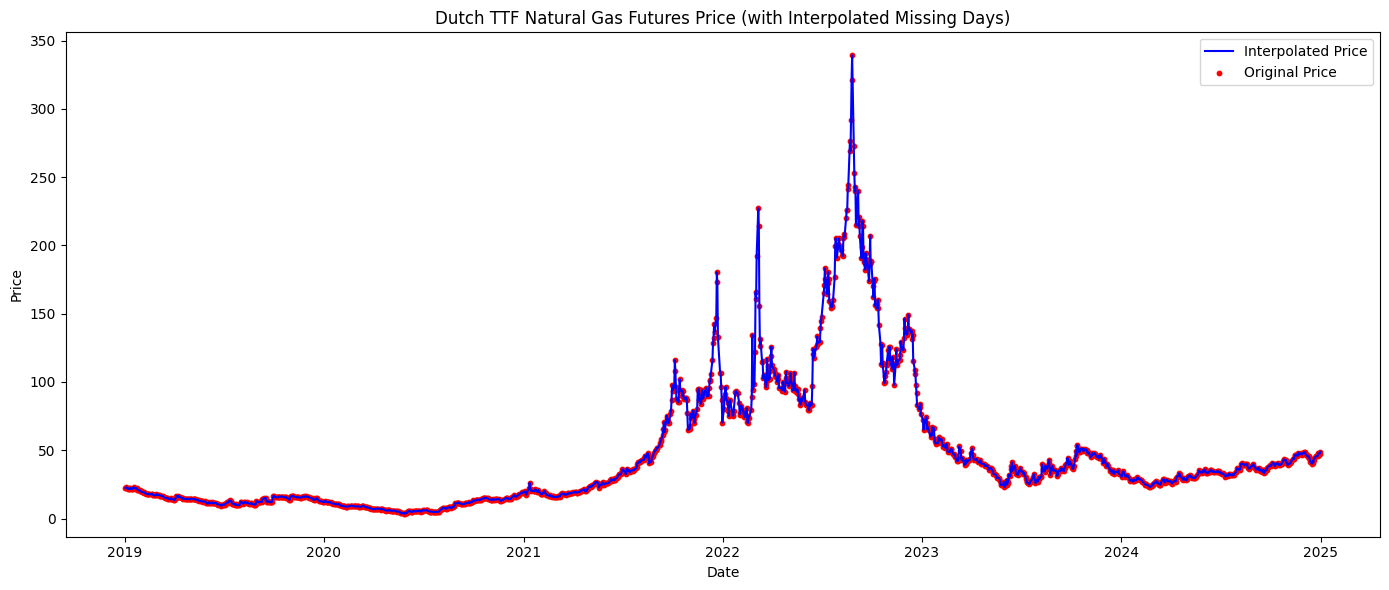

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(df_full.index, df_full['Price'], label='Interpolated Price', color='blue')
plt.scatter(df.index, df['Price'], color='red', s=10, label='Original Price')
plt.title('Dutch TTF Natural Gas Futures Price (with Interpolated Missing Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

## Predicting Netherlands Electricity Prices for 2025 Using Gas Prices (SARIMAX)
We will use the synthetic hourly gas prices as an exogenous variable to predict hourly electricity prices in the Netherlands for the period 2025-01-01 to 2025-05-12 20:00 using the SARIMAX model. The model will be trained on all available data up to 2025-01-01.

**Note:** For best results, tune the SARIMAX order and seasonal parameters, and ensure the electricity price column is correctly selected. This workflow uses gas prices as an exogenous regressor and predicts electricity prices for the specified 2025 period.

In [77]:
# Export the TTF data with hourly prices to a new CSV file
# If you want the synthetic hourly prices, use df_hourly_synth if it exists, otherwise use df_full.resample('H').ffill()
try:
    df_hourly_out = df_hourly_synth.copy()
except NameError:
    df_hourly_out = df_full.resample('H').ffill()

# Save to CSV
output_path = 'TTF_Hourly_Prices.csv'
df_hourly_out.to_csv(output_path)
print(f"Hourly TTF prices exported to {output_path}")

Hourly TTF prices exported to TTF_Hourly_Prices.csv


## Use the Exported Hourly TTF CSV for Modeling
Now we will use the exported 'TTF_Hourly_Prices.csv' as the gas price input for the SARIMAX model, ensuring the workflow is reproducible and modular.